<a href="https://colab.research.google.com/github/CarlosGatti/python-finance/blob/main/MC_Predicting_Stock_Prices_Solution_Yahoo_Py3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monte Carlo - Forecasting Stock Prices

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2021-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [12]:
S0 = data.iloc[-1]
S0

MSFT    248.160004
Name: 2021-05-10 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [13]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [15]:
price_list[0] = S0
price_list

array([[248.16000366, 248.16000366, 248.16000366, ..., 248.16000366,
        248.16000366, 248.16000366],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [16]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [17]:
price_list

array([[248.16000366, 248.16000366, 248.16000366, ..., 248.16000366,
        248.16000366, 248.16000366],
       [248.934913  , 249.88231737, 246.99607732, ..., 241.71029946,
        248.97781847, 251.11791435],
       [248.08003389, 253.41868092, 243.81393657, ..., 241.56386112,
        244.70693649, 247.17055461],
       ...,
       [258.96436541, 451.84029089, 408.91304246, ..., 379.02355442,
        300.75709704, 242.51583236],
       [255.51374279, 459.2835153 , 406.67331808, ..., 387.27466434,
        302.77786741, 238.95890014],
       [246.63777793, 447.31370717, 405.24164103, ..., 391.16663797,
        303.67944498, 240.6410274 ]])

Finally, plot the obtained price list data.

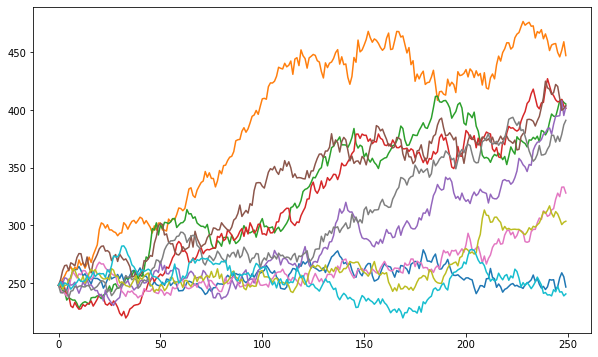

In [18]:
plt.figure(figsize=(10,6))
plt.plot(price_list);